<a href="https://colab.research.google.com/github/NaraaBold/DiverNaraa/blob/main/Hard_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Problem 1] Share and execute the official tutorial model

TensorFlow 2 quickstart for beginners

In [101]:
#import libraries
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.2


In [ ]:
# Data preparation
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# Build a model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [ ]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.02574458,  0.4612338 ,  0.2260874 , -0.57808363, -0.12326742,
         0.50553745, -0.40429252, -0.30255386, -0.21471693, -0.14279906]],
      dtype=float32)

In [ ]:
tf.nn.softmax(predictions).numpy()

array([[0.10211014, 0.15783359, 0.12476037, 0.05582511, 0.08797389,
        0.1649834 , 0.06642111, 0.07353442, 0.08028562, 0.08627228]],
      dtype=float32)

In [ ]:
#Define loss function 
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
#Compile model
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
#Train and evaluate your model

model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

#to return a probability
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

probability_model(x_test[:5])

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2994 - accuracy: 0.9132
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1456 - accuracy: 0.9564
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1108 - accuracy: 0.9660
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0884 - accuracy: 0.9729
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0771 - accuracy: 0.9759
313/313 - 1s - loss: 0.0758 - accuracy: 0.9778 - 502ms/epoch - 2ms/step


<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[4.28559161e-07, 1.01940021e-08, 3.01267050e-06, 9.60963516e-05,
        2.37218334e-09, 1.20698724e-06, 9.26193584e-13, 9.99862671e-01,
        1.19182187e-05, 2.46723830e-05],
       [1.18302379e-09, 5.25848809e-05, 9.99937773e-01, 8.73480803e-06,
        1.74543813e-15, 4.66227306e-07, 8.14762746e-09, 1.97574636e-13,
        4.52705137e-07, 1.43534290e-14],
       [5.70558029e-07, 9.98944700e-01, 3.75276111e-04, 1.27480753e-05,
        7.48712409e-05, 1.43389525e-05, 3.98007114e-06, 5.40179375e-04,
        3.12031480e-05, 2.20982884e-06],
       [9.86009598e-01, 2.84334494e-08, 1.11400113e-02, 1.74755428e-06,
        3.31026706e-04, 7.17384000e-06, 6.37094199e-05, 1.70256803e-03,
        5.08527319e-06, 7.39054522e-04],
       [1.60949571e-06, 3.08483084e-09, 3.26347595e-06, 3.23078098e-08,
        9.88446116e-01, 4.41135938e-07, 3.74108322e-06, 8.15149615e-05,
        5.97289409e-06, 1.14573427e-02]], dtype=float32)>

TensorFlow 2 quickstart for experts

In [ ]:
#import libraries
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

TensorFlow version: 2.8.2


In [ ]:
# Data preparation
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
#Use tf.data to batch and shuffle the dataset:
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [ ]:
#Build model
class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.conv1 = Conv2D(32, 3, activation='relu')
    self.flatten = Flatten()
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(10)

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

# Create an instance of the model
model = MyModel()

In [ ]:
#Define optimizer and loss function
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

optimizer = tf.keras.optimizers.Adam()

In [ ]:
# Metrics to measure the loss and the accuracy of the model
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [ ]:
#Define train function using tf.GradientTape
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(images, training=True)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [ ]:
#Define test function
@tf.function
def test_step(images, labels):
  # training=False is only needed if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  predictions = model(images, training=False)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [ ]:
#training
EPOCHS = 5

for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  print(
    f'Epoch {epoch + 1}, '
    f'Loss: {train_loss.result()}, '
    f'Accuracy: {train_accuracy.result() * 100}, '
    f'Test Loss: {test_loss.result()}, '
    f'Test Accuracy: {test_accuracy.result() * 100}'
  )

Epoch 1, Loss: 0.13655102252960205, Accuracy: 95.875, Test Loss: 0.06303399056196213, Test Accuracy: 97.7699966430664
Epoch 2, Loss: 0.04368405044078827, Accuracy: 98.58999633789062, Test Loss: 0.04777175188064575, Test Accuracy: 98.43000030517578
Epoch 3, Loss: 0.022292302921414375, Accuracy: 99.26499938964844, Test Loss: 0.05585107579827309, Test Accuracy: 98.2699966430664
Epoch 4, Loss: 0.014806898310780525, Accuracy: 99.51000213623047, Test Loss: 0.05855222046375275, Test Accuracy: 98.38999938964844
Epoch 5, Loss: 0.009555594064295292, Accuracy: 99.68000030517578, Test Loss: 0.06362653523683548, Test Accuracy: 98.54000091552734


[Question 2] (Advanced task) Execute various methods

Object detection

In [ ]:
#@title Imports and function definitions

# For running inference on the TF-Hub module.
import tensorflow as tf

import tensorflow_hub as hub

# For downloading the image.
import matplotlib.pyplot as plt
import tempfile
from six.moves.urllib.request import urlopen
from six import BytesIO

# For drawing onto the image.
import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

# For measuring the inference time.
import time

# Print Tensorflow version
print(tf.__version__)

# Check available GPU devices.
print("The following GPU devices are available: %s" % tf.test.gpu_device_name())

2.8.2
The following GPU devices are available: 


In [ ]:
def display_image(image):
  fig = plt.figure(figsize=(20, 15))
  plt.grid(False)
  plt.imshow(image)


def download_and_resize_image(url, new_width=256, new_height=256,
                              display=False):
  _, filename = tempfile.mkstemp(suffix=".jpg")
  response = urlopen(url)
  image_data = response.read()
  image_data = BytesIO(image_data)
  pil_image = Image.open(image_data)
  pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS)
  pil_image_rgb = pil_image.convert("RGB")
  pil_image_rgb.save(filename, format="JPEG", quality=90)
  print("Image downloaded to %s." % filename)
  if display:
    display_image(pil_image)
  return filename


def draw_bounding_box_on_image(image,
                               ymin,
                               xmin,
                               ymax,
                               xmax,
                               color,
                               font,
                               thickness=4,
                               display_str_list=()):
  """Adds a bounding box to an image."""
  draw = ImageDraw.Draw(image)
  im_width, im_height = image.size
  (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                ymin * im_height, ymax * im_height)
  draw.line([(left, top), (left, bottom), (right, bottom), (right, top),
             (left, top)],
            width=thickness,
            fill=color)

  # If the total height of the display strings added to the top of the bounding
  # box exceeds the top of the image, stack the strings below the bounding box
  # instead of above.
  display_str_heights = [font.getsize(ds)[1] for ds in display_str_list]
  # Each display_str has a top and bottom margin of 0.05x.
  total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)

  if top > total_display_str_height:
    text_bottom = top
  else:
    text_bottom = top + total_display_str_height
  # Reverse list and print from bottom to top.
  for display_str in display_str_list[::-1]:
    text_width, text_height = font.getsize(display_str)
    margin = np.ceil(0.05 * text_height)
    draw.rectangle([(left, text_bottom - text_height - 2 * margin),
                    (left + text_width, text_bottom)],
                   fill=color)
    draw.text((left + margin, text_bottom - text_height - margin),
              display_str,
              fill="black",
              font=font)
    text_bottom -= text_height - 2 * margin


def draw_boxes(image, boxes, class_names, scores, max_boxes=10, min_score=0.1):
  """Overlay labeled boxes on an image with formatted scores and label names."""
  colors = list(ImageColor.colormap.values())

  try:
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",
                              25)
  except IOError:
    print("Font not found, using default font.")
    font = ImageFont.load_default()

  for i in range(min(boxes.shape[0], max_boxes)):
    if scores[i] >= min_score:
      ymin, xmin, ymax, xmax = tuple(boxes[i])
      display_str = "{}: {}%".format(class_names[i].decode("ascii"),
                                     int(100 * scores[i]))
      color = colors[hash(class_names[i]) % len(colors)]
      image_pil = Image.fromarray(np.uint8(image)).convert("RGB")
      draw_bounding_box_on_image(
          image_pil,
          ymin,
          xmin,
          ymax,
          xmax,
          color,
          font,
          display_str_list=[display_str])
      np.copyto(image, np.array(image_pil))
  return image

Image downloaded to /tmp/tmp60bihzjb.jpg.


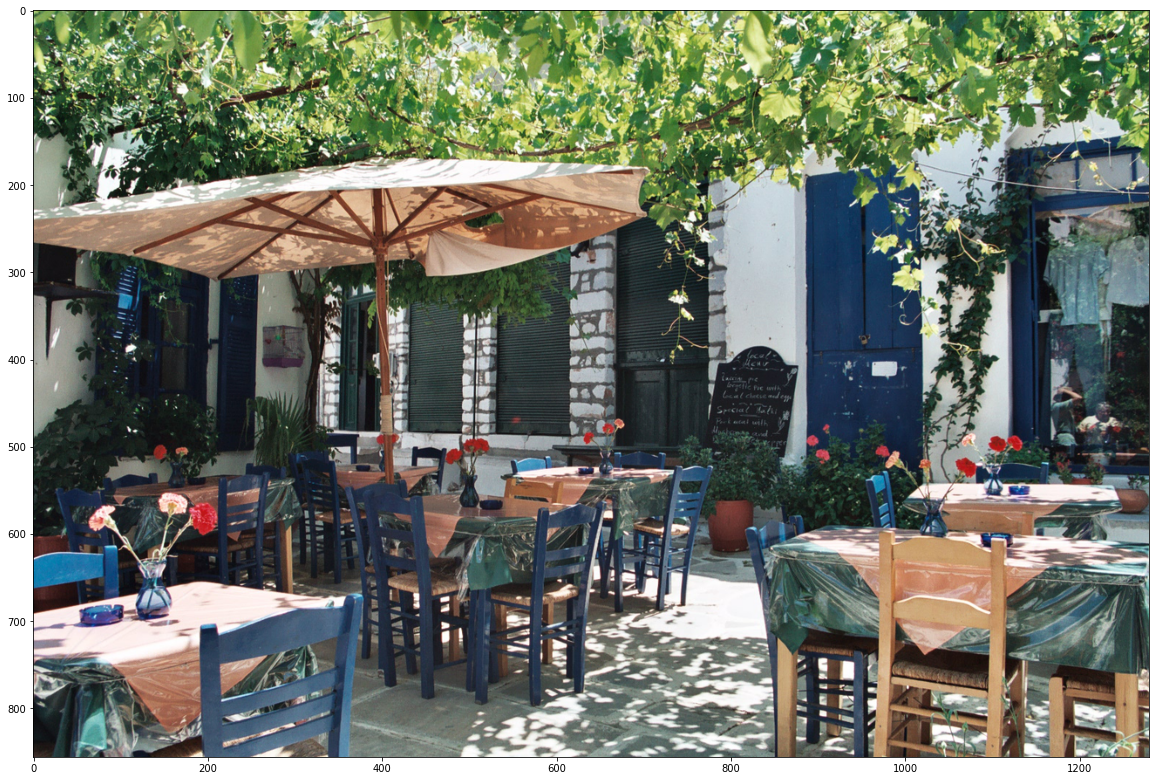

In [ ]:
# By Heiko Gorski, Source: https://commons.wikimedia.org/wiki/File:Naxos_Taverna.jpg
image_url = "https://upload.wikimedia.org/wikipedia/commons/6/60/Naxos_Taverna.jpg"  #@param
downloaded_image_path = download_and_resize_image(image_url, 1280, 856, True)

In [ ]:
module_handle = 'https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2'

detector = hub.load(module_handle)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [ ]:
def load_img(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  return img

In [ ]:
img = load_img(downloaded_image_path)

converted_img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]
start_time = time.time()
result = detector(converted_img)
end_time = time.time()

In [ ]:
# different object detection models have additional results
# all of them are explained in the documentation
results = {key:value.numpy() for key,value in result.items()}
print(results.keys())

dict_keys(['detection_class_labels', 'detection_boxes', 'detection_class_names', 'detection_scores', 'detection_class_entities'])


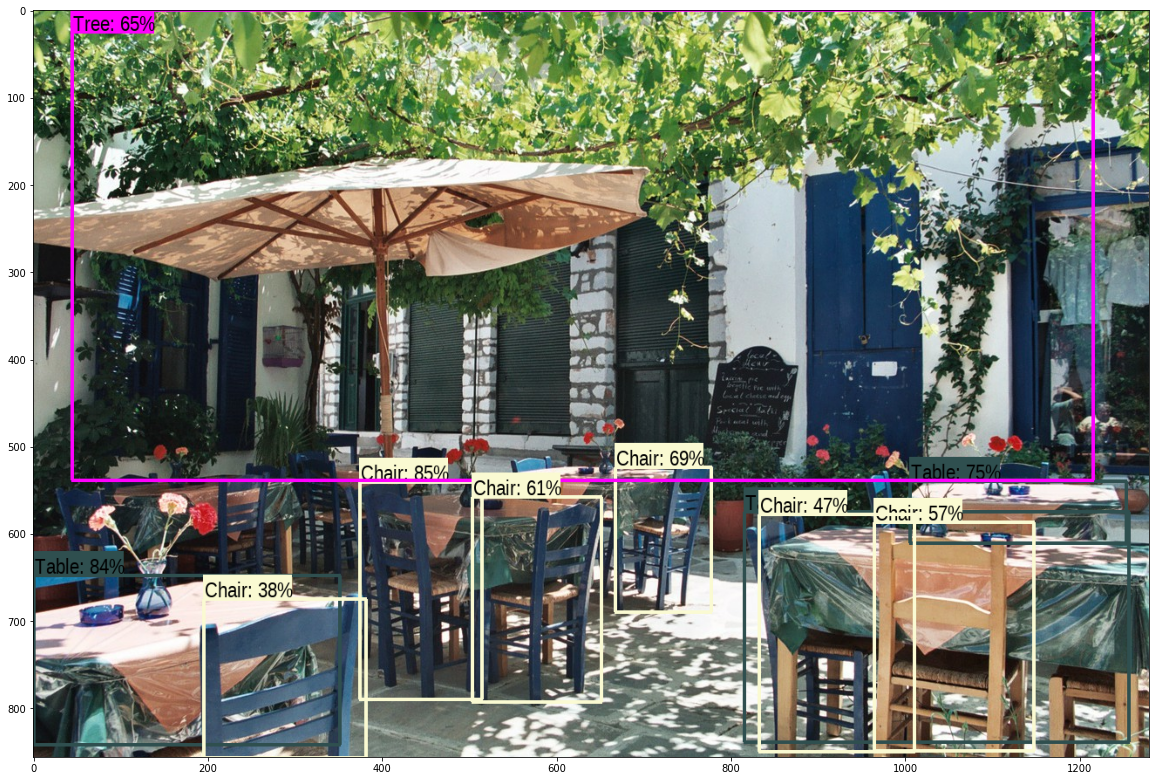

In [ ]:
image_with_boxes = draw_boxes(img.numpy(), results["detection_boxes"], results["detection_class_entities"], results["detection_scores"])

display_image(image_with_boxes)

[Problem 3] Learning Iris (binary classification) with Keras

In [103]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# data preparation
df = pd.read_csv("Iris.csv")

# データフレームから条件抽出
df = df[(df["Species"] == "Iris-versicolor") | (df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]

# NumPy 配列に変換
X = np.array(X)
y = np.array(y)
# ラベルを数値に変換
y[y == "Iris-versicolor"] = 0
y[y == "Iris-virginica"] = 1
y = y.astype(np.int64)[:, np.newaxis]

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [104]:
# Build a models
models = {}
models[0] = tf.keras.models.Sequential([
  tf.keras.layers.Dense(20, input_shape=(4,), activation='relu'),
  tf.keras.layers.Dense(7, activation='relu'),
  tf.keras.layers.Dense(1)
])

models[1] = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, input_shape=(4,), activation='relu'),
  tf.keras.layers.Dense(1)
])

models[2] = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, input_shape=(4,), activation='relu'),
  tf.keras.layers.Dense(5, activation='relu'),
  tf.keras.layers.Dense(1)
])

#Define loss function 
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

history_dict = {}

for i in range(3):
    models[i].compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
    
    history = models[i].fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size = 8)
    score = models[i].evaluate(X_test,  y_test, verbose=2)
    print ('Model {} => Test loss: {:.4f}, Test acccurary : {:.3f}'.format(i, score[0], score[1]))
    history_dict[i] = history

Epoch 1/20
8/8 [==============================] - 1s 43ms/step - loss: 1.4418 - accuracy: 0.4688 - val_loss: 0.9443 - val_accuracy: 0.6250
Epoch 2/20
8/8 [==============================] - 0s 8ms/step - loss: 1.1638 - accuracy: 0.4688 - val_loss: 0.7880 - val_accuracy: 0.6250
Epoch 3/20
8/8 [==============================] - 0s 10ms/step - loss: 0.9346 - accuracy: 0.4688 - val_loss: 0.6748 - val_accuracy: 0.6250
Epoch 4/20
8/8 [==============================] - 0s 12ms/step - loss: 0.7652 - accuracy: 0.4688 - val_loss: 0.6142 - val_accuracy: 0.6250
Epoch 5/20
8/8 [==============================] - 0s 5ms/step - loss: 0.6739 - accuracy: 0.4688 - val_loss: 0.6248 - val_accuracy: 0.6250
Epoch 6/20
8/8 [==============================] - 0s 5ms/step - loss: 0.6642 - accuracy: 0.4688 - val_loss: 0.6230 - val_accuracy: 0.6250
Epoch 7/20
8/8 [==============================] - 0s 5ms/step - loss: 0.6401 - accuracy: 0.4688 - val_loss: 0.6031 - val_accuracy: 0.6250
Epoch 8/20
8/8 [===============

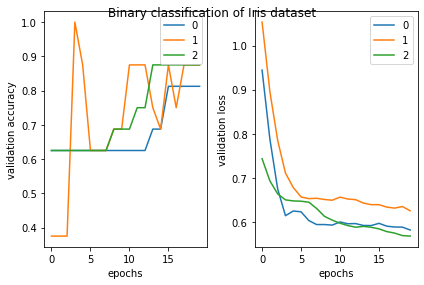

In [105]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Binary classification of Iris dataset')

for i in range(3):
    val_accurady = history_dict[i].history['val_accuracy']
    val_loss = history_dict[i].history['val_loss']
    ax1.plot(val_accurady, label=i)
    ax2.plot(val_loss, label=i)
    
ax1.set_ylabel('validation accuracy')
ax1.set_xlabel('epochs')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.tight_layout()
plt.show()

[Problem 4] Learning Iris (multi-value classification) with Keras

In [108]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("Iris.csv")

y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)
y[y == "Iris-versicolor"] = 0
y[y == "Iris-virginica"] = 1
y[y == "Iris-setosa"] = 2
y = y.astype(np.int)[:, np.newaxis]

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]


In [109]:
# Build a models
models = {}
models[0] = tf.keras.models.Sequential([
  tf.keras.layers.Dense(20, input_shape=(4,), activation='relu'),
  tf.keras.layers.Dense(7, activation='relu'),
  tf.keras.layers.Dense(3, activation='Softmax')
])

models[1] = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, input_shape=(4,), activation='relu'),
  tf.keras.layers.Dense(3, activation='Softmax')
])

models[2] = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, input_shape=(4,), activation='relu'),
  tf.keras.layers.Dense(5, activation='relu'),
  tf.keras.layers.Dense(3, activation='Softmax')
])

#Define loss function 
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
history_dict = {}

for i in range(3):
    models[i].compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
    
    history = models[i].fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size = 8)
    score = models[i].evaluate(X_test,  y_test, verbose=2)
    print ('Model {} => Test loss: {:.4f}, Test acccurary : {:.3f}'.format(i, score[0], score[1]))
    history_dict[i] = history

Epoch 1/20
12/12 [==============================] - 1s 17ms/step - loss: 1.2011 - accuracy: 0.3125 - val_loss: 1.1923 - val_accuracy: 0.2917
Epoch 2/20
12/12 [==============================] - 0s 7ms/step - loss: 1.1623 - accuracy: 0.3125 - val_loss: 1.1528 - val_accuracy: 0.2917
Epoch 3/20
12/12 [==============================] - 0s 4ms/step - loss: 1.1327 - accuracy: 0.3125 - val_loss: 1.1280 - val_accuracy: 0.2917
Epoch 4/20
12/12 [==============================] - 0s 5ms/step - loss: 1.1143 - accuracy: 0.5312 - val_loss: 1.1120 - val_accuracy: 0.6250
Epoch 5/20
12/12 [==============================] - 0s 4ms/step - loss: 1.1007 - accuracy: 0.6354 - val_loss: 1.0984 - val_accuracy: 0.6250
Epoch 6/20
12/12 [==============================] - 0s 6ms/step - loss: 1.0838 - accuracy: 0.6354 - val_loss: 1.0732 - val_accuracy: 0.6250
Epoch 7/20
12/12 [==============================] - 0s 6ms/step - loss: 1.0638 - accuracy: 0.6354 - val_loss: 1.0634 - val_accuracy: 0.6250
Epoch 8/20
12/12 [=

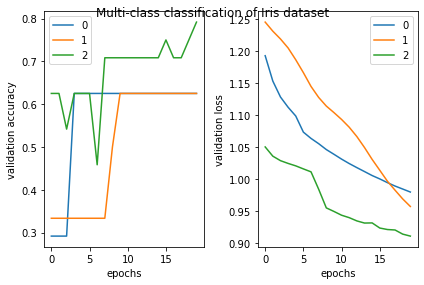

In [110]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Multi-class classification of Iris dataset')

for i in range(3):
    val_accurady = history_dict[i].history['val_accuracy']
    val_loss = history_dict[i].history['val_loss']
    ax1.plot(val_accurady, label=i)
    ax2.plot(val_loss, label=i)
    
ax1.set_ylabel('validation accuracy')
ax1.set_xlabel('epochs')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.tight_layout()
plt.show()

[Problem 5] Learning House Prices with Keras

In [124]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

#Data preparation of House Price dataset
dataset_path ="train.csv"
df = pd.read_csv(dataset_path)
y = df["SalePrice"]
X = df.loc[:, ["GrLivArea", "YearBuilt"]]
y = np.array(y)
X = np.array(X)
y = y.astype(np.int)[:, np.newaxis]
y = np.log(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
mmsc = MinMaxScaler()
X_train = mmsc.fit_transform(X_train)
X_test = mmsc.transform(X_test)
X_val = mmsc.transform(X_val)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if sys.path[0] == '':


In [125]:
# Build a models
models = {}
models[0] = tf.keras.models.Sequential([
  tf.keras.layers.Dense(20, input_shape=(2,), activation='relu'),
  tf.keras.layers.Dense(7, activation='relu'),
  tf.keras.layers.Dense(1)
])

models[1] = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, input_shape=(2,), activation='relu'),
  tf.keras.layers.Dense(1)
])

models[2] = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, input_shape=(2,), activation='relu'),
  tf.keras.layers.Dense(5,  activation='relu'),
  tf.keras.layers.Dense(1)
])

#Define loss function 
loss_fn = tf.keras.losses.MeanSquaredError()
history_dict = {}

for i in range(3):
    models[i].compile(optimizer='adam',
              loss=loss_fn,
              metrics=[tf.keras.metrics.MeanSquaredError()])
    
    history = models[i].fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size = 8)
    score = models[i].evaluate(X_test,  y_test, verbose=2)
    print ('Model {} => Test loss: {:.4f}, Test MSE : {:.3f}'.format(i, score[0], score[1]))
    history_dict[i] = history

Epoch 1/20
117/117 [==============================] - 1s 3ms/step - loss: 144.4263 - mean_squared_error: 144.4263 - val_loss: 141.6324 - val_mean_squared_error: 141.6324
Epoch 2/20
117/117 [==============================] - 0s 2ms/step - loss: 140.3486 - mean_squared_error: 140.3486 - val_loss: 137.0286 - val_mean_squared_error: 137.0286
Epoch 3/20
117/117 [==============================] - 0s 2ms/step - loss: 125.5286 - mean_squared_error: 125.5286 - val_loss: 104.5301 - val_mean_squared_error: 104.5301
Epoch 4/20
117/117 [==============================] - 0s 2ms/step - loss: 69.0983 - mean_squared_error: 69.0983 - val_loss: 30.1738 - val_mean_squared_error: 30.1738
Epoch 5/20
117/117 [==============================] - 0s 2ms/step - loss: 11.5587 - mean_squared_error: 11.5587 - val_loss: 2.1909 - val_mean_squared_error: 2.1909
Epoch 6/20
117/117 [==============================] - 0s 2ms/step - loss: 2.0765 - mean_squared_error: 2.0765 - val_loss: 1.6495 - val_mean_squared_error: 1.649

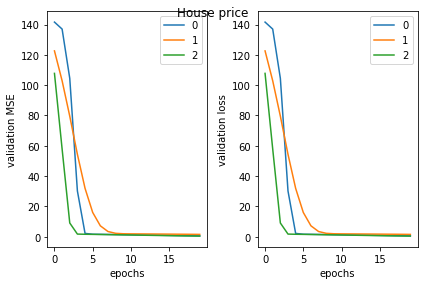

In [126]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('House price')

for i in range(3):
    val_accurady = history_dict[i].history['val_mean_squared_error']
    val_loss = history_dict[i].history['val_loss']
    ax1.plot(val_accurady, label=i)
    ax2.plot(val_loss, label=i)
    
ax1.set_ylabel('validation MSE')
ax1.set_xlabel('epochs')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.tight_layout()
plt.show()

[Problem 6] Learning MNIST with Keras

In [127]:
# Data preparation
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

In [128]:
# Build a models
models = {}
models[0] = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

models[1] = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

models[2] = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

#Define loss function 
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
history_dict = {}

for i in range(3):
    models[i].compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
    
    history = models[i].fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size = 64)
    score = models[i].evaluate(x_test,  y_test, verbose=2)
    print ('Model {} => Test loss: {:.4f}, Test acccurary : {:.3f}'.format(i, score[0], score[1]))
    history_dict[i] = history

Epoch 1/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3750 - accuracy: 0.8928 - val_loss: 0.1823 - val_accuracy: 0.9472
Epoch 2/10
750/750 [==============================] - 3s 3ms/step - loss: 0.1829 - accuracy: 0.9468 - val_loss: 0.1301 - val_accuracy: 0.9617
Epoch 3/10
750/750 [==============================] - 3s 3ms/step - loss: 0.1347 - accuracy: 0.9605 - val_loss: 0.1084 - val_accuracy: 0.9673
Epoch 4/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1089 - accuracy: 0.9674 - val_loss: 0.0926 - val_accuracy: 0.9718
Epoch 5/10
750/750 [==============================] - 3s 3ms/step - loss: 0.0923 - accuracy: 0.9724 - val_loss: 0.0880 - val_accuracy: 0.9730
Epoch 6/10
750/750 [==============================] - 3s 3ms/step - loss: 0.0799 - accuracy: 0.9755 - val_loss: 0.0791 - val_accuracy: 0.9766
Epoch 7/10
750/750 [==============================] - 3s 3ms/step - loss: 0.0682 - accuracy: 0.9784 - val_loss: 0.0794 - val_accuracy: 0.9748
Epoch 

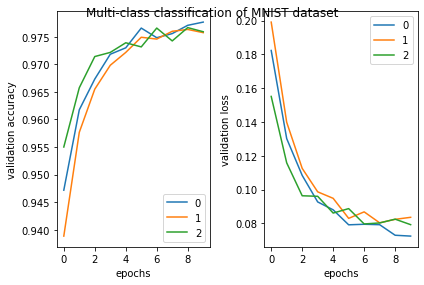

In [130]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Multi-class classification of MNIST dataset')

for i in range(3):
    val_accurady = history_dict[i].history['val_accuracy']
    val_loss = history_dict[i].history['val_loss']
    ax1.plot(val_accurady, label=i)
    ax2.plot(val_loss, label=i)
    
ax1.set_ylabel('validation accuracy')
ax1.set_xlabel('epochs')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.tight_layout()
plt.show()

[Problem 7] (Advanced assignment) Rewriting to PyTorch

In [139]:
#Import Libraries

import torch, torchvision
from torchvision import datasets, transforms
from torch import nn, optim
from torch.nn import functional as F

import numpy as np


In [140]:
batch_size = 128
num_epochs = 2
device = torch.device('cpu')

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 10, kernel_size=5),
            nn.MaxPool2d(2),
            nn.ReLU(),
            nn.Conv2d(10, 20, kernel_size=5),
            nn.Dropout(),
            nn.MaxPool2d(2),
            nn.ReLU(),
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(320, 50),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(50, 10),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(-1, 320)
        x = self.fc_layers(x)
        return x

In [141]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output.log(), target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output.log(), target).item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('mnist_data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor()
                   ])),
    batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('mnist_data', train=False, transform=transforms.Compose([
                       transforms.ToTensor()
                   ])),
    batch_size=batch_size, shuffle=True)

model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

for epoch in range(1, num_epochs + 1):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to mnist_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to mnist_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist_data/MNIST/raw

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.312694
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.184488
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1.231479
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.875439
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.798508

Test set: Average loss: 0.0046, Accuracy: 8994/10000 (90%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.609554
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.642807
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.411123
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.405278
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.397183

Test set: Average loss: 0.0025, Accuracy: 9412/10000 (94%)

